# TidyTuesday 2022 week 20

Analysing [Eurovision data](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-17/readme.md), scraped and cleaned from eurovision.tv by Tanya Shapiro.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.patches as patches
from matplotlib import font_manager

%matplotlib inline

In [2]:
#load data
df = pd.read_csv("eurovision.csv")

In [48]:
df.head()

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
0,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,6.0,337.0,1.0,1st,True,False
1,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,S10,De Diepte,https://eurovision.tv/participant/s10-22,https://static.eurovision.tv/hb-cgi/images/963...,Netherlands,:flag_nl:,8.0,221.0,2.0,2nd,True,False
2,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Amanda Georgiadi Tenfjord,Die Together,https://eurovision.tv/participant/amanda-georg...,https://static.eurovision.tv/hb-cgi/images/963...,Greece,:flag_gr:,15.0,211.0,3.0,3rd,True,False
3,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,MARO,"Saudade, Saudade",https://eurovision.tv/participant/maro-22,https://static.eurovision.tv/hb-cgi/images/963...,Portugal,:flag_pt:,10.0,208.0,4.0,4th,True,False
4,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Intelligent Music Project,Intention,https://eurovision.tv/participant/intelligent-...,https://static.eurovision.tv/hb-cgi/images/963...,Bulgaria,:flag_bg:,7.0,29.0,16.0,16th,False,False


## Zero points

In [164]:
## Cleaning
df1 = df[((df["section"]=="final") | (df["section"]=="grand-final"))
           & (df["year"]!=1956) & (df["year"]!=2020)][["year","artist_country", "total_points"]]

#recode NaN into 0 points when part of final
df1["total_points"] = df1["total_points"].fillna(0)

#get dummy column for when 0 points
total_points_r = []
for i in df1["total_points"]:
    if i == 0:
        total_points_r.append(1)    
    elif i > 0:
        total_points_r.append(0)
    else:
        total_points_r.append(np.nan)

df1["zero_points"] = total_points_r
df1["zero_points"].value_counts()

0    1322
1      37
Name: zero_points, dtype: int64

In [165]:
#pivot
pivot = df1.groupby(["artist_country","year"]).agg({"zero_points":"first"}).unstack()
pivot.columns = pivot.columns.droplevel(level=0)

pivot["total_zero"] = pivot.sum(axis=1)
pivot = pivot[pivot["total_zero"]>0].sort_values(by="total_zero", ascending=False)

pivot.head()

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2021,2022,total_zero
artist_country,,,,,,,,,,,,,,,,,,,,,
Austria,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
Norway,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0
Finland,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,3.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0
Spain,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
United Kingdom,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,2.0


In [225]:
font_r = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\GothamBook.ttf')
font_m = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\GothamMedium.ttf')
font_b = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\GothamBold.ttf')

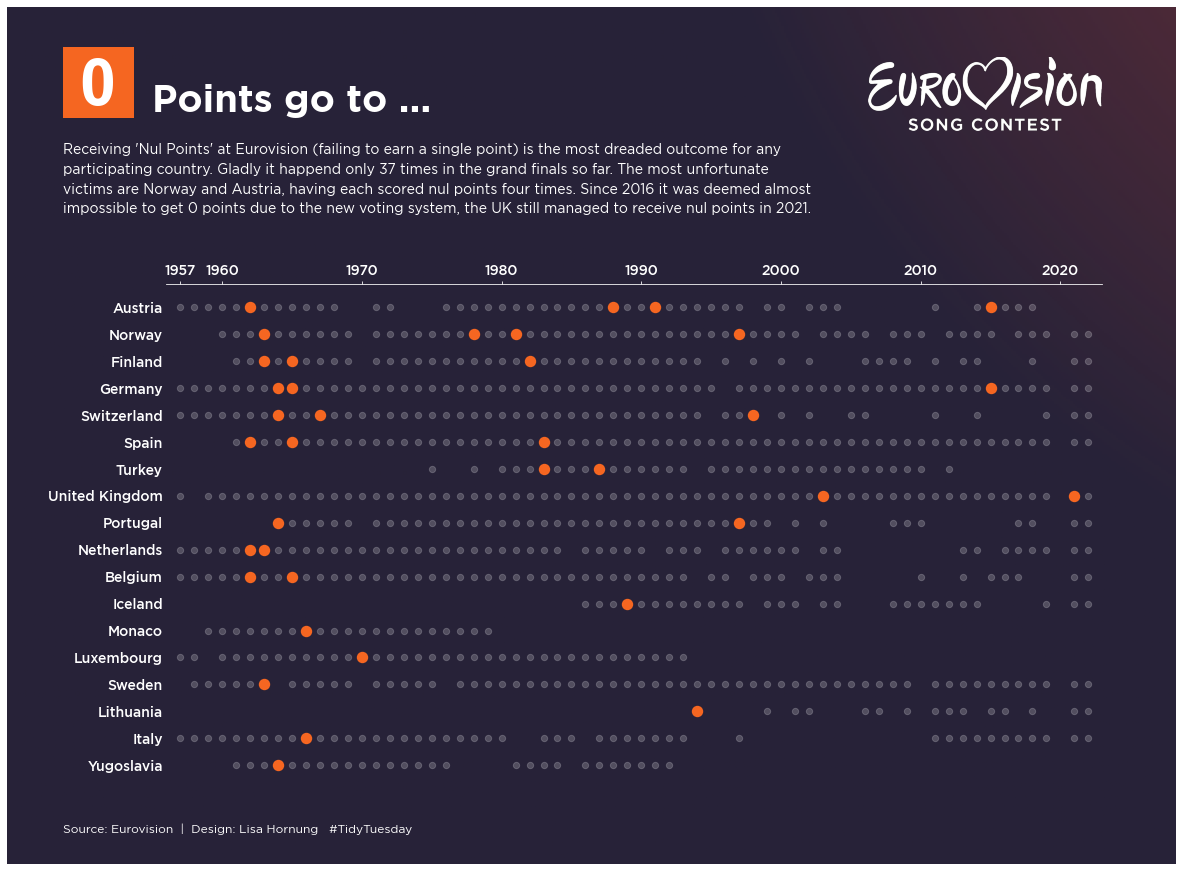

In [294]:
## plot
data = pivot.sort_values(by="total_zero").drop(columns="total_zero")
data = data.transpose()

#=======
#base
fig, ax = plt.subplots(figsize=(13,7))
fig.set_facecolor('white')
ax.axis('off')

#========
# data
# use colors to show participation + highligh zero points
dax = fig.add_axes([0, 0, 1, 1], zorder=2)
y_pos = 1
for column in data.columns:
    df_f = data[data[column]>=0][column]
    for i in range(len(df_f)):
        dax.scatter(df_f.index[i], y_pos, color = 'white', s=40, zorder=3 , alpha=0.2)
        if df_f.iloc[i]==1:
            dax.scatter(df_f.index[i], y_pos, color = "#f56621", linewidth=0,
                        edgecolor='white', s=130, zorder=3 )    
    y_pos +=1

# =======
# general styling
for pos in ['right', 'left', 'bottom']:
    dax.spines[pos].set_visible(False)
dax.spines["top"].set(edgecolor="white")
dax.patch.set_alpha(0)     

# =======
# x-axis
dax.xaxis.tick_top()
dax.set_xlim(xmin=1956, xmax=2023)
dax.set_xticks([1957, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
dax.set_xticklabels(dax.get_xticks(), rotation = 0, fontsize=14, ha='center', color='white', fontproperties=font_m)
dax.tick_params(axis='x', color = 'white')

# y-axis
dax.set_yticks(np.arange(1,19,1))
dax.set_yticklabels(data.columns.to_list(), fontsize=14, ha='right', color='white', fontproperties=font_m)
dax.tick_params(axis='y', length = 0, color = "#444444")

#=======
# add background image
im = plt.imread('euro-background-3.png')
bax = fig.add_axes([-0.17,-0.15,1.65,1.7], anchor='SW',zorder=1)
bax.imshow(im)
bax.axis('off')

# add logo
im = plt.imread('Eurovision_generic_white.png')
newax = fig.add_axes([0.75,1.05,0.25,0.40], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

#add quare
sqax = fig.add_axes([-0.11,1.33,0.075,0.14], anchor='NE', zorder=1)
sqax.add_patch(patches.Rectangle((0, 0), 1, 1, edgecolor=None, facecolor="#f56621", linewidth=0, clip_on=False))
sqax.axis('off')

#======
#Title, footer, notes
para = "Receiving 'Nul Points' at Eurovision (failing to earn a single point) is the most dreaded outcome for any\nparticipating country. Gladly it happend only 37 times in the grand finals so far. The most unfortunate\nvictims are Norway and Austria, having each scored nul points four times. Since 2016 it was deemed almost\nimpossible to get 0 points due to the new voting system, the UK still managed to receive nul points in 2021."

plt.figtext(-0.093,1.33, "0", fontfamily='Arial', color="white",fontweight ='bold',va='bottom', fontsize=65)
plt.figtext(-0.015,1.33, "Points go to ...", fontproperties=font_b, color="white", va='bottom',fontsize=38)
plt.figtext(-0.11,1.28, para, fontproperties=font_r, color="white", fontsize=14, va="top", linespacing=1.6)
plt.figtext(-0.11,-0.07, "Source: Eurovision  |  Design: Lisa Hornung   #TidyTuesday", 
            fontproperties=font_r, color="white", fontsize=12, va="top")

#save
plt.savefig("TidyTuesday_eurovision_v1.png", bbox_inches="tight",pad_inches=0)

plt.show()

# Exploration

Looked into not just 0 points but up to 5 points. Found it not very telling, so disregarded the idea.

In [156]:
## Cleaning
df1 = df[((df["section"]=="final") | (df["section"]=="grand-final"))
           & (df["year"]!=1956) & (df["year"]!=2020)][["year","artist_country", "total_points"]]

#recode NaN into 0 points when part of final
df1["total_points"] = df1["total_points"].fillna(0)

#get dummy column for when 0 points       
zero_points = []
for i in df1["total_points"]:
    if i == 0:
        zero_points.append(1)    
    elif i > 0:
        zero_points.append(0)
    else:
        zero_points.append(np.nan)
        
#get dummy column for when 0 points
five_points = []
for i in df1["total_points"]:
    if i == 0:
        five_points.append(1)
    elif i <= 5:
        five_points.append(2)    
    elif i > 5:
        five_points.append(0)
    else:
        five_points.append(np.nan)

df1["zero_points"] = zero_points
df1["five_points"] = five_points

df1["five_points"].value_counts()

0    1206
2     116
1      37
Name: five_points, dtype: int64

In [158]:
#pivot
pivot = df1.groupby(["artist_country","year"]).agg({"five_points":"first"}).unstack()
pivot.columns = pivot.columns.droplevel(level=0)

pivot["total_five"] = pivot.sum(axis=1)
pivot = pivot[pivot["total_five"]>0].sort_values(by="total_five", ascending=False)

pivot

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2021,2022,total_five
artist_country,,,,,,,,,,,,,,,,,,,,,
Belgium,2.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,...,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,20.0
Norway,NaN,NaN,NaN,0.0,0.0,2.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,20.0
Netherlands,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,20.0
Germany,0.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,19.0
Austria,2.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,18.0
Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,18.0
Finland,NaN,NaN,NaN,NaN,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,17.0
Switzerland,2.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,15.0
Denmark,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,12.0


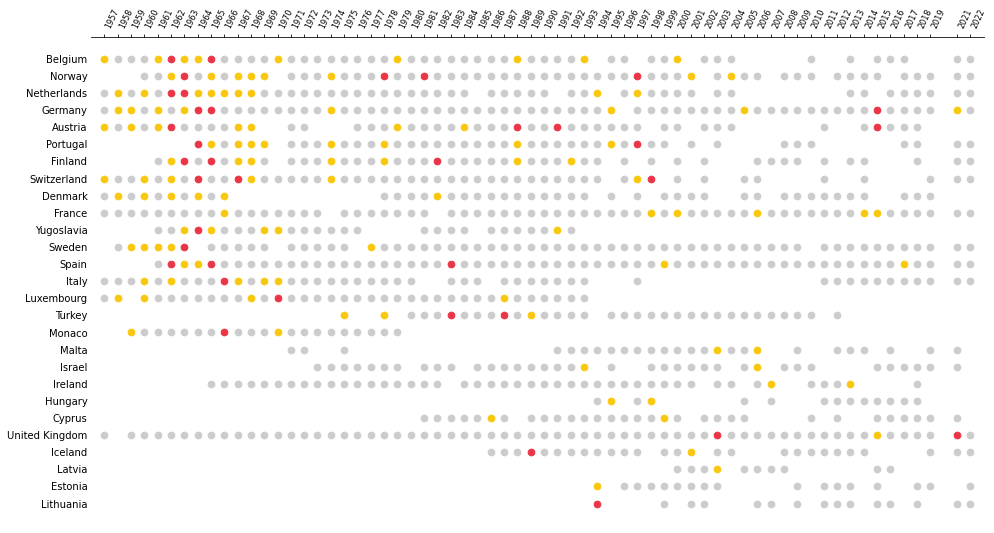

In [162]:
## plot
data = pivot.sort_values(by="total_five").drop(columns="total_five")

data = data.transpose()
colrs = {"b_col": "white", 0: "#cccccc", 1: "#ea3546", 2: "#f9c80e"}

#=======
#base
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor(colrs["b_col"])

#========
# data
# use colors to show participation + highligh zero points
y_pos = 1
for column in data.columns:
    df_f = data[data[column]>=0][column]
    for i in range(len(df_f)):
        ax.scatter(df_f.index[i], y_pos, color = colrs[df_f.iloc[i]], s=45 ) 
    y_pos +=1

# =======
# general styling
for pos in ['right', 'left', 'bottom']:
    ax.spines[pos].set_visible(False)
ax.patch.set_alpha(0)     


# =======
# x-axis
ax.xaxis.tick_top()
ax.set_xlim(xmin=1956, xmax=2023)
ax.set_xticks(data.index.to_list())
ax.set_xticklabels(ax.get_xticks(), rotation = 65, fontsize=8, ha='left')

# y-axis
ax.set_yticks(np.arange(1,28,1))
ax.set_yticklabels(data.columns.to_list(), fontsize=10, ha='right')
ax.tick_params(axis='y', length = 0, color = "#444444")

plt.show()
